In [68]:
import pandas as pd
donner = pd.read_csv('donner.csv')




slope: -0.01335811360204437
intercept: 0.8692324569894554
R: -0.332573571747557
SE(slope): 0.005776575683969789


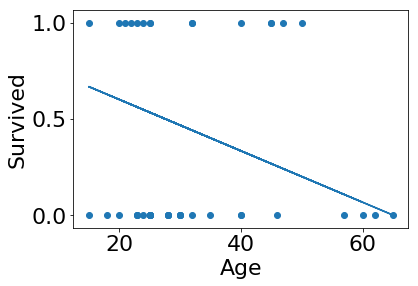

In [69]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

plt.scatter(donner.AGE, donner.FEMALE)

import scipy.stats as stats

slope, intercept, r_value, p_value, std_err = stats.linregress(donner.AGE, donner.SURVIVED)

print('slope:', slope)
print('intercept:', intercept)
print('R:', r_value)
print('SE(slope):', std_err)

yhat = [slope*x+intercept for x in donner.AGE]

plt.plot(donner.AGE, yhat)
plt.xlabel('Age')
plt.ylabel('Survived')
#plt.show()
plt.savefig('C:/Users/sofia/Dropbox/Apps/Overleaf/Applied  Statistics Course/figures/log_res_age.png')  


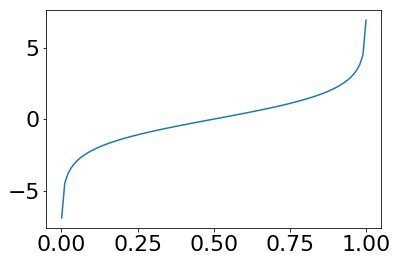

In [70]:
# logit, inverse logit function 
import numpy as np

x = np.linspace(0.001, 0.999, 100).tolist()
y = [np.log(p/(1-p)) for p in x]


plt.plot(x, y)

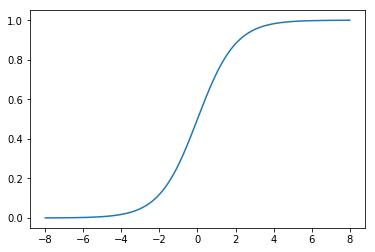

In [21]:
#inverse logit

x = np.linspace(-8, 8, 1000).tolist()
y = [1/(1+np.exp(-p)) for p in x]


plt.plot(x, y)

In [91]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

X = donner.AGE
X= add_constant(X)
Y = donner.SURVIVED
# building the model and fitting the data
log_reg = sm.Logit(Y, X).fit()

print(log_reg.summary2())


Optimization terminated successfully.
         Current function value: 0.625452
         Iterations 6
                        Results: Logit
Model:              Logit            No. Iterations:   6.0000 
Dependent Variable: SURVIVED         Pseudo R-squared: 0.090  
Date:               2022-05-26 12:47 AIC:              60.2907
No. Observations:   45               BIC:              63.9040
Df Model:           1                Log-Likelihood:   -28.145
Df Residuals:       43               LL-Null:          -30.913
Converged:          1.0000           Scale:            1.0000 
---------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
---------------------------------------------------------------
const       1.8185    0.9994   1.8197  0.0688  -0.1402   3.7773
AGE        -0.0665    0.0322  -2.0630  0.0391  -0.1296  -0.0033



In [92]:
from sklearn import linear_model as lr
clf = lr.LogisticRegression().fit(X, Y)

print(clf.coef_)
print(clf.intercept_)

[[ 0.62072939 -0.04909915]]
[0.62072939]


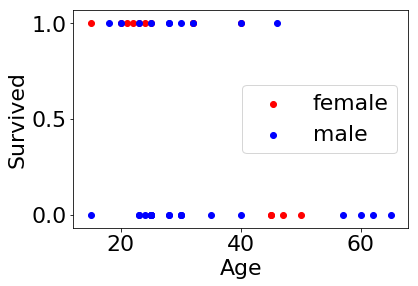

In [93]:
x = np.linspace(0, 100, 100)
x = add_constant(x)
female = (donner.FEMALE==1)
plt.scatter(donner.AGE[female], donner.SURVIVED[female], c ='red',label ='female')
plt.scatter(donner.AGE[~female], donner.SURVIVED[~female], c='blue',  label ='male')

plt.legend()

# yhat = log_reg.predict(x)
# x = np.linspace(0, 100, 100)
# plt.plot(x, yhat)

plt.xlabel('Age')
plt.ylabel('Survived')
plt.savefig('C:/Users/sofia/Dropbox/Apps/Overleaf/Applied  Statistics Course/figures/log_res_age_fitted.png')  


In [94]:
X = donner[['AGE', 'FEMALE']]
X=add_constant(X)
Y = donner.SURVIVED
# building the model and fitting the data
log_reg = sm.Logit(Y, X).fit()

print(log_reg.summary2())
lr =log_reg.summary2


# import matplotlib.pyplot as plt
# plt.rc('figure', figsize=(12, 7))
# #plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
# plt.text(0.01, 0.05, str(log_reg.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
# plt.axis('off')# plt.tight_layout()
# plt.savefig('output.png')

Optimization terminated successfully.
         Current function value: 0.569514
         Iterations 6
                        Results: Logit
Model:              Logit            No. Iterations:   6.0000 
Dependent Variable: SURVIVED         Pseudo R-squared: 0.171  
Date:               2022-05-26 12:48 AIC:              57.2563
No. Observations:   45               BIC:              62.6763
Df Model:           2                Log-Likelihood:   -25.628
Df Residuals:       42               LL-Null:          -30.913
Converged:          1.0000           Scale:            1.0000 
---------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
---------------------------------------------------------------
const       1.6331    1.1102   1.4710  0.1413  -0.5429   3.8092
AGE        -0.0782    0.0373  -2.0973  0.0360  -0.1513  -0.0051
FEMALE      1.5973    0.7555   2.1142  0.0345   0.1165   3.0780



In [96]:
from sklearn import linear_model as lr
clf = lr.LogisticRegression().fit(X, Y)

print(clf.coef_)
print(clf.intercept_)

[[ 0.53118312 -0.05493944  1.06133315]]
[0.53118312]


In [25]:
emails = pd.read_csv('email.csv')


# delete time column
del emails['time']
del emails['number']

# convert winner to numerical
level_mapping = {'no': 0, 'yes': 1}
winner = emails['winner'].copy()
winner = winner.replace(level_mapping)
emails['winner'] = winner

emails



spam  to_multiple  from  cc  sent_email  image  attach  dollar  winner  \
0        0            0     1   0           0      0       0       0       0   
1        0            0     1   0           0      0       0       0       0   
2        0            0     1   0           0      0       0       4       0   
3        0            0     1   0           0      0       0       0       0   
4        0            0     1   0           0      0       0       0       0   
5        0            0     1   0           0      0       0       0       0   
6        0            1     1   0           1      0       0       0       0   
7        0            1     1   1           1      1       1       0       0   
8        0            0     1   0           0      0       0       0       0   
9        0            0     1   0           0      0       0       0       0   
10       0            0     1   0           1      0       0       0       0   
11       0            0     1   1           0      0       0       0       0   
12       0            0     1   0           0      0       0       0       0   
13       0            0     1   1           1      0       0       0       0   
14       0            0     1   2           0      0       0       2       0   
15       0            0     1   1           1      0       0       0       0   
16       0            0     1   0           0      0       0       5       0   
17       0            0     1   2           0      0       0       0       0   
18       0            0     1   0           1      0       0       0       0   
19       0            0     1   0           0      0       0       0       0   
20       0            0     1   0           0      0       0       0       0   
21       0            0     1   0           0      2       2       9       0   
22       0            0     1   0           0      0       0      21       0   
23       0            0     1   0           1      0       0       0       0   
24       0            0     1   0           0      0       0       0       0   
25       0            0     1   0           0      0       0       0       0   
26       0            0     1   1           0      0       0       0       0   
27       0            0     1   2           0      0       0       0       0   
28       0            0     1   0           0      0       0       0       0   
29       0            0     1   0           0      0       0       0       0   
...    ...          ...   ...  ..         ...    ...     ...     ...     ...   
3891     1            0     1   0           0      0       2       0       0   
3892     1            0     1   0           0      0       0       5       0   
3893     1            0     1   0           0      0       0       3       0   
3894     1            1     1   0           0      0       2       0       0   
3895     1            0     1   0           0      0       0       0       0   
3896     1            0     1   0           0      0       0       0       0   
3897     1            0     1   0           0      0       1       0       0   
3898     1            0     1   0           0      0       0       0       0   
3899     1            0     1   0           0      0       0       0       1   
3900     1            0     1   0           0      0       0       0       0   
3901     1            0     1   0           0      0       2       0       0   
3902     1            0     1   0           0      0       0       0       0   
3903     1            0     1   0           0      0       0       4       0   
3904     1            0     1   0           0      0       0       0       0   
3905     1            0     1   0           0      0       0       4       0   
3906     1            0     1   0           0      0       0       1       0   
3907     1            0     1   0           0      0       0       0       0   
3908     1            0     1   0           0      0       0       0       0   
3909  

In [98]:
yheader =emails.columns[0]
xheader = emails.columns[2:18]

Y = emails[yheader]
X = emails[['to_multiple', 'image', 'attach', 'winner', 'format','re_subj']]

X = add_constant(X)

log_reg = sm.Logit(Y, X).fit()

print(log_reg.summary2())
lr =log_reg.summary2


Optimization terminated successfully.
         Current function value: 0.248912
         Iterations 10
                         Results: Logit
Model:              Logit            No. Iterations:   10.0000  
Dependent Variable: spam             Pseudo R-squared: 0.199    
Date:               2022-05-26 12:48 AIC:              1965.9699
No. Observations:   3921             BIC:              2009.8886
Df Model:           6                Log-Likelihood:   -975.98  
Df Residuals:       3914             LL-Null:          -1218.6  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -0.8921   0.0892  -9.9985 0.0000 -1.0670 -0.7173
to_multiple     -2.6719   0.3073  -8.6936 0.0000 -3.2743 -2.0695
image           -2.4903   1.0228  -2.4346 0.0149 -4.4950 -0.4855
attach      

In [108]:
from sklearn import linear_model as lr
clf = lr.LogisticRegression().fit(X, Y)

print(clf.coef_)
print(clf.intercept_)
yhat = clf.predict_proba([[1, 0, 0, 0, 1, 0, 0]])
yhat

[[-0.45564089 -2.43682052 -1.5202543   0.45503679  1.48901031 -1.49396259
  -2.7552273 ]]
[-0.45564089]


array([[0.35945543, 0.64054457]])

In [109]:
a = log_reg.predict([1, 0, 0, 0, 1, 0, 0])
print(a)
print(np.exp(a)/(1+np.exp(a)))


[0.68319075]
[0.66445047]


In [66]:
np.exp(1.5)

4.4816890703380645